In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import beta
import networkx as nx

In [2]:
G = [nx.read_adjlist(f"input/bianconi-barabasi_10000_5/{i}.adjlist", nodetype=int) for i in range(100)]

In [3]:
values = [n for _,n in G[0].degree]

In [4]:
np.unique(sorted(values))

array([   5,    6,    7,    8,    9,   10,   11,   12,   13,   14,   15,
         16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
         27,   28,   29,   30,   31,   32,   33,   34,   35,   36,   37,
         38,   39,   40,   41,   42,   43,   44,   45,   46,   47,   48,
         49,   50,   51,   52,   53,   54,   55,   56,   57,   58,   59,
         60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   71,
         72,   74,   75,   76,   78,   79,   80,   81,   82,   83,   85,
         86,   87,   88,   90,   92,   95,   96,   97,   98,  100,  101,
        102,  104,  105,  106,  108,  110,  115,  116,  122,  123,  126,
        128,  130,  136,  138,  140,  143,  148,  150,  151,  153,  154,
        160,  163,  181,  185,  187,  190,  192,  207,  210,  224,  241,
        244,  267,  282,  289,  290,  390,  418,  426,  452,  735,  778,
       1056, 1497])

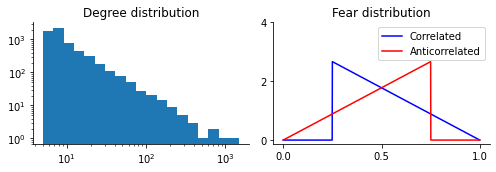

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(7,2.5))

bins = np.logspace(np.log10(min(values)), np.log10(max(values)), 20)
axs[0].hist(values, bins=bins)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_title("Degree distribution")

xs = np.linspace(0,1,1001)
axs[1].plot(xs, beta.pdf(xs,1,2,loc=1/4,scale=3/4), color="blue", label="Correlated")
axs[1].plot(xs, beta.pdf(xs,2,1,scale=3/4), color="red", label="Anticorrelated")
axs[1].set_title("Fear distribution")
axs[1].set_xticks(np.linspace(0,1,3))
axs[1].set_yticks(np.linspace(0,4,3))
axs[1].legend()

for ax in axs:
    ax.spines[["top","right"]].set_visible(False)
fig.tight_layout()
fig.savefig("plots/fear-distribution-correlation.png")